In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [2]:
# Load feature and target data
features = pd.read_csv(r'D:\JN\data set\created dataset\ECG\resampled_ecg_data_with_filenames.csv', header=None)  # Adjust header based on your CSV format
targets = pd.read_csv(r'D:\JN\data set\data from web\Reference_aug.csv', header=None)

In [3]:
# Remove the first row and first column
features = features.iloc[1:, 1:]

# Reset the index
features.reset_index(drop=True, inplace=True)

# Display the modified DataFrame
print(features)

          1         2         3         4         5         6         7     \
0    -0.023873 -0.140097  0.551965  1.273784  1.656054  1.236455  0.578188   
1     0.114260 -0.468456 -0.796333 -0.731826 -0.490805  0.034018  0.466617   
2    -0.029745 -0.678755 -1.078899 -1.117278 -1.041515 -1.029329 -0.978918   
3     0.294993  0.370118  0.395976  0.297360  0.197768 -0.110464 -0.387916   
4     2.635974 -0.477237  0.317410 -0.212062  0.080581 -0.215373  0.007647   
...        ...       ...       ...       ...       ...       ...       ...   
1970 -0.746986 -0.222445 -0.562907 -0.968201 -0.658942  0.162998  0.444016   
1971 -1.884327 -3.377690 -3.194005 -3.164295 -2.135691 -0.726756  0.558096   
1972  1.460539  0.325789  0.670434 -0.038581  0.000566  0.527610  1.119249   
1973 -0.593717 -0.558448 -0.000675 -0.214169 -0.272598  0.231196  0.841991   
1974 -0.214565 -0.339738  0.393540  0.129058 -0.265946 -0.028391  0.736185   

          8         9         10    ...      2039      2040    

In [4]:
# Extract target column
y = targets.iloc[:, -1]  # Selecting the last column
X = features  # All feature columns

# Using .apply() method
y = y.apply(lambda x: max(x, 0))

In [5]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# If you need them as DataFrames with original column names
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# SVM

In [7]:
# Train an SVM model
svm_model = SVC(kernel='linear')  # You can try different kernels like 'rbf' or 'poly'

In [8]:
svm_model.fit(X_train, y_train.values.ravel())  # Flatten y_train for proper fitting

SVC(kernel='linear')

In [9]:
# Make predictions
y_pred = svm_model.predict(X_test)

In [10]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.53


# xgboost

In [11]:
import xgboost as xgb

In [12]:
# Train an XGBoost classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

In [13]:
# Convert -1 to 0 in y_train
y_train = (y_train == 1).astype(int)

In [14]:
# Then fit the model
xgb_model.fit(X_train, y_train)

C:\Users\sanji\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:42:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [15]:
# Make predictions
y_pred = svm_model.predict(X_test)

In [16]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.53


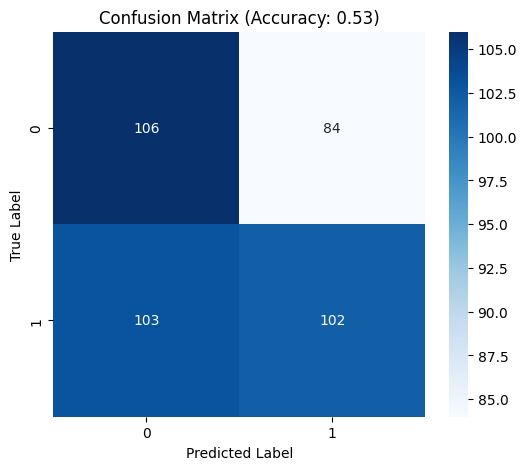

Model Accuracy: 0.53


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title(f"Confusion Matrix (Accuracy: {accuracy:.2f})")
plt.show()

# Print accuracy
print(f"Model Accuracy: {accuracy:.2f}")


In [18]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [19]:
##  LogisticRegression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
# Predict on training and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred) * 100
test_accuracy = accuracy_score(y_test, y_test_pred) * 100

# Print results
print(f"Training Accuracy: {train_accuracy:.2f}%")
print(f"Testing Accuracy: {test_accuracy:.2f}%\n")

print("Classification Report (on test data):")
print(classification_report(y_test, y_test_pred))

Training Accuracy: 92.72%
Testing Accuracy: 52.66%

Classification Report (on test data):
              precision    recall  f1-score   support

           0       0.51      0.56      0.53       190
           1       0.55      0.50      0.52       205

    accuracy                           0.53       395
   macro avg       0.53      0.53      0.53       395
weighted avg       0.53      0.53      0.53       395



C:\Users\sanji\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
##  KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
# Predict on training and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred) * 100
test_accuracy = accuracy_score(y_test, y_test_pred) * 100

# Print results
print(f"Training Accuracy: {train_accuracy:.2f}%")
print(f"Testing Accuracy: {test_accuracy:.2f}%\n")

print("Classification Report (on test data):")
print(classification_report(y_test, y_test_pred))

Training Accuracy: 48.73%
Testing Accuracy: 52.15%

Classification Report (on test data):
              precision    recall  f1-score   support

           0       1.00      0.01      0.01       190
           1       0.52      1.00      0.68       205

    accuracy                           0.52       395
   macro avg       0.76      0.50      0.35       395
weighted avg       0.75      0.52      0.36       395



In [21]:
##  SVM
from sklearn.svm import SVC

model = SVC(kernel='linear')
model.fit(X_train, y_train)
# Predict on training and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred) * 100
test_accuracy = accuracy_score(y_test, y_test_pred) * 100

# Print results
print(f"Training Accuracy: {train_accuracy:.2f}%")
print(f"Testing Accuracy: {test_accuracy:.2f}%\n")

print("Classification Report (on test data):")
print(classification_report(y_test, y_test_pred))

Training Accuracy: 97.34%
Testing Accuracy: 52.66%

Classification Report (on test data):
              precision    recall  f1-score   support

           0       0.51      0.56      0.53       190
           1       0.55      0.50      0.52       205

    accuracy                           0.53       395
   macro avg       0.53      0.53      0.53       395
weighted avg       0.53      0.53      0.53       395



In [22]:
##  Naïve Bayes
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)
# Predict on training and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred) * 100
test_accuracy = accuracy_score(y_test, y_test_pred) * 100

# Print results
print(f"Training Accuracy: {train_accuracy:.2f}%")
print(f"Testing Accuracy: {test_accuracy:.2f}%\n")

print("Classification Report (on test data):")
print(classification_report(y_test, y_test_pred))

Training Accuracy: 70.95%
Testing Accuracy: 51.65%

Classification Report (on test data):
              precision    recall  f1-score   support

           0       0.50      0.60      0.54       190
           1       0.54      0.44      0.49       205

    accuracy                           0.52       395
   macro avg       0.52      0.52      0.51       395
weighted avg       0.52      0.52      0.51       395



In [23]:
##  Decision Tree
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
# Predict on training and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred) * 100
test_accuracy = accuracy_score(y_test, y_test_pred) * 100

# Print results
print(f"Training Accuracy: {train_accuracy:.2f}%")
print(f"Testing Accuracy: {test_accuracy:.2f}%\n")

print("Classification Report (on test data):")
print(classification_report(y_test, y_test_pred))

Training Accuracy: 100.00%
Testing Accuracy: 52.91%

Classification Report (on test data):
              precision    recall  f1-score   support

           0       0.51      0.57      0.54       190
           1       0.55      0.49      0.52       205

    accuracy                           0.53       395
   macro avg       0.53      0.53      0.53       395
weighted avg       0.53      0.53      0.53       395



In [24]:
##  Random Forest
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
# Predict on training and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred) * 100
test_accuracy = accuracy_score(y_test, y_test_pred) * 100

# Print results
print(f"Training Accuracy: {train_accuracy:.2f}%")
print(f"Testing Accuracy: {test_accuracy:.2f}%\n")

print("Classification Report (on test data):")
print(classification_report(y_test, y_test_pred))

Training Accuracy: 100.00%
Testing Accuracy: 59.24%

Classification Report (on test data):
              precision    recall  f1-score   support

           0       0.56      0.70      0.62       190
           1       0.64      0.49      0.56       205

    accuracy                           0.59       395
   macro avg       0.60      0.60      0.59       395
weighted avg       0.60      0.59      0.59       395



In [25]:
##  xgboost
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train, y_train)
# Predict on training and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred) * 100
test_accuracy = accuracy_score(y_test, y_test_pred) * 100

# Print results
print(f"Training Accuracy: {train_accuracy:.2f}%")
print(f"Testing Accuracy: {test_accuracy:.2f}%\n")

print("Classification Report (on test data):")
print(classification_report(y_test, y_test_pred))

Training Accuracy: 100.00%
Testing Accuracy: 61.01%

Classification Report (on test data):
              precision    recall  f1-score   support

           0       0.58      0.70      0.63       190
           1       0.65      0.53      0.58       205

    accuracy                           0.61       395
   macro avg       0.62      0.61      0.61       395
weighted avg       0.62      0.61      0.61       395

